In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length','sepal-width','petal-length','petal-width','class']

df = pd.read_csv(url,names=cls)


In [3]:
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.replace({'class':{'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}})

df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Text(0.5, 1.0, 'CORRELATION')

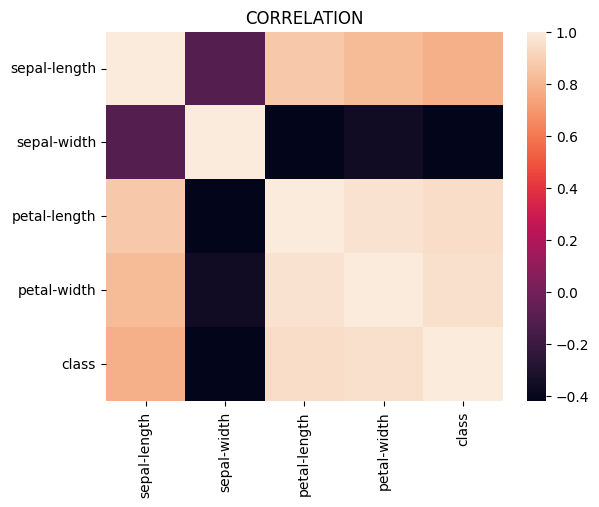

In [5]:
plt.figure(1)
sns.heatmap(df.corr())
plt.title("CORRELATION")


In [12]:
df.corr()

,sepal-length,sepal-width,petal-length,petal-width,class
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state=0)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(cm)

print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.94      0.97        16
           3       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [11]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=5)

print("Accuracy = {:.2f} % ".format(accuracies.mean()*100))
print("Standard Deviation = {:.2f} % ".format(accuracies.std()*100))


Accuracy = 97.31 % 
Standard Deviation = 2.20 % 
